In [276]:
# Таблица с процентами

result = result.sort_values('customer_unique_id', ascending=False)
result['percent'] = round((result['customer_unique_id'] * 100) / result['customer_unique_id'].sum(), 2).astype(str) + ' %'
result.head()

,RFM,customer_unique_id,percent,RFM_score
0,111,36779,39.4 %,111
1,112,17968,19.25 %,112
2,113,17273,18.5 %,113
18,311,4906,5.26 %,311
9,211,4536,4.86 %,211


In [277]:
result.dtypes

RFM                   object
customer_unique_id     int64
percent               object
RFM_score              int32
dtype: object

In [278]:
result['RFM_score'] = result['RFM'].astype(int)

In [279]:
result.dtypes

RFM                   object
customer_unique_id     int64
percent               object
RFM_score              int32
dtype: object

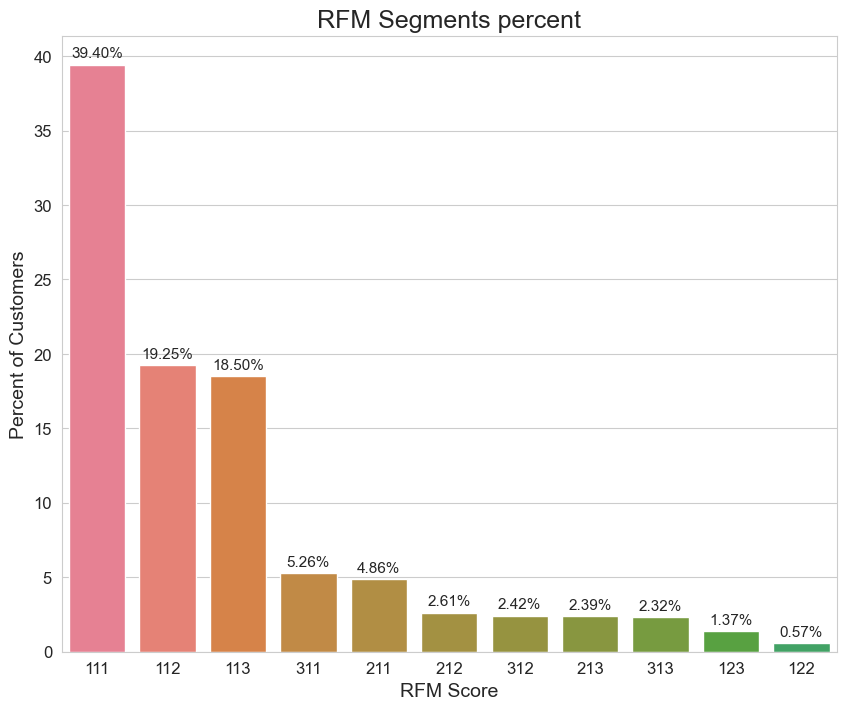

In [283]:
# Создаю столбец 'percent_numeric'
result['percent_numeric'] = result['percent'].str[:-2].astype(float)

# График
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
# (выведем до 0.50%)
ax = sns.barplot(data=result[result['percent_numeric'] > 0.5], x='RFM', y='percent_numeric', palette=colors)

plt.xlabel('RFM Score', fontsize=14)
plt.ylabel('Percent of Customers', fontsize=14)
plt.title('RFM Segments percent', fontsize=18)

plt.tick_params(labelsize=12)

# Добавляю проценты над столбцами
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()